__Libraries__

In [1]:
import os
import shutil
import random
from collections import Counter
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

2023-02-04 12:31:49.988148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


__Convolutional Neural Network Setup (EfficientNetB7)__

In [2]:
file_location = os.getcwd()

train_path = file_location+"/data/train"
valid_path = file_location+"/data/valid"
test_path = file_location+"/data/test"
test_TI_SD1_path = file_location+"/data/TISD1"
test_TI_SD2_path = file_location+"/data/TISD2"

In [3]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD1_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD1_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD2_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD2_path,target_size=(224,224), batch_size=10, shuffle=False)

Found 330 images belonging to 5 classes.
Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.


In [4]:
efficientnetv2l = tf.keras.applications.efficientnet_v2.EfficientNetV2L()
#efficientnetv2l.summary()

2023-02-04 12:32:08.653263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


478307632/478307632 [==============================] - 20s 0us/step


In [5]:
efficientnetv2l.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 32  864         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 120, 120, 64  8192        ['block2a_expand_activation[0][0]
                                )                                ']                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 120, 120, 64  256        ['block2a_project_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 120, 120, 25  147456      ['block2a_project_bn[0][0]']     
                                6)                                                                
                                                                                                  
 block2b_e

 lization)                      )                                                                 
                                                                                                  
 block2e_drop (Dropout)         (None, 120, 120, 64  0           ['block2e_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block2e_add (Add)              (None, 120, 120, 64  0           ['block2e_drop[0][0]',           
                                )                                 'block2d_add[0][0]']            
                                                                                                  
 block2f_expand_conv (Conv2D)   (None, 120, 120, 25  147456      ['block2e_add[0][0]']            
                                6)                                                                
          

 block3c_expand_conv (Conv2D)   (None, 60, 60, 384)  331776      ['block3b_add[0][0]']            
                                                                                                  
 block3c_expand_bn (BatchNormal  (None, 60, 60, 384)  1536       ['block3c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3c_expand_activation (Act  (None, 60, 60, 384)  0          ['block3c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3c_project_conv (Conv2D)  (None, 60, 60, 96)   36864       ['block3c_expand_activation[0][0]
                                                                 ']                               
          

                                                                                                  
 block3g_project_conv (Conv2D)  (None, 60, 60, 96)   36864       ['block3g_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3g_project_bn (BatchNorma  (None, 60, 60, 96)  384         ['block3g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3g_drop (Dropout)         (None, 60, 60, 96)   0           ['block3g_project_bn[0][0]']     
                                                                                                  
 block3g_add (Add)              (None, 60, 60, 96)   0           ['block3g_drop[0][0]',           
          

                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 30, 30, 768)  147456      ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 30, 30, 768)  3072       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 30, 30, 768)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4c_d

 ization)                                                                                         
                                                                                                  
 block4e_expand_activation (Act  (None, 30, 30, 768)  0          ['block4e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4e_dwconv2 (DepthwiseConv  (None, 30, 30, 768)  6912       ['block4e_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4e_bn (BatchNormalization  (None, 30, 30, 768)  3072       ['block4e_dwconv2[0][0]']        
 )                                                                                                
          

 block4g_dwconv2 (DepthwiseConv  (None, 30, 30, 768)  6912       ['block4g_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4g_bn (BatchNormalization  (None, 30, 30, 768)  3072       ['block4g_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4g_activation (Activation  (None, 30, 30, 768)  0          ['block4g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4g_se_squeeze (GlobalAver  (None, 768)         0           ['block4g_activation[0][0]']     
 agePoolin

                                                                                                  
 block4i_activation (Activation  (None, 30, 30, 768)  0          ['block4i_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4i_se_squeeze (GlobalAver  (None, 768)         0           ['block4i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4i_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4i_se_squeeze[0][0]']     
                                                                                                  
 block4i_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4i_se_reshape[0][0]']     
          

 block5a_se_squeeze (GlobalAver  (None, 1152)        0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 30, 30, 1152  0           ['block5a_activation[0][0]',     
          

                                                                                                  
 block5c_se_excite (Multiply)   (None, 30, 30, 1344  0           ['block5c_activation[0][0]',     
                                )                                 'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 30, 30, 224)  301056      ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 30, 30, 224)  0           ['block5c_project_bn[0][0]']     
          

                                                                                                  
 block5e_project_conv (Conv2D)  (None, 30, 30, 224)  301056      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_drop (Dropout)         (None, 30, 30, 224)  0           ['block5e_project_bn[0][0]']     
                                                                                                  
 block5e_add (Add)              (None, 30, 30, 224)  0           ['block5e_drop[0][0]',           
                                                                  'block5d_add[0][0]']            
          

 block5g_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5g_drop (Dropout)         (None, 30, 30, 224)  0           ['block5g_project_bn[0][0]']     
                                                                                                  
 block5g_add (Add)              (None, 30, 30, 224)  0           ['block5g_drop[0][0]',           
                                                                  'block5f_add[0][0]']            
                                                                                                  
 block5h_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5g_add[0][0]']            
                                )                                                                 
          

 block5i_drop (Dropout)         (None, 30, 30, 224)  0           ['block5i_project_bn[0][0]']     
                                                                                                  
 block5i_add (Add)              (None, 30, 30, 224)  0           ['block5i_drop[0][0]',           
                                                                  'block5h_add[0][0]']            
                                                                                                  
 block5j_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5j_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5j_expand_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                  'block5j_add[0][0]']            
                                                                                                  
 block5l_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5k_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5l_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5l_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5l_expand_activation (Act  (None, 30, 30, 1344  0          ['block5l_expand_bn[0][0]']      
 ivation)                       )                                                                 
          

                                )                                                                 
                                                                                                  
 block5n_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5n_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5n_expand_activation (Act  (None, 30, 30, 1344  0          ['block5n_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5n_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5n_expand_activation[0][0]
 2D)                            )                                ']                               
          

 ization)                       )                                                                 
                                                                                                  
 block5p_expand_activation (Act  (None, 30, 30, 1344  0          ['block5p_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5p_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5p_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5p_bn (BatchNormalization  (None, 30, 30, 1344  5376       ['block5p_dwconv2[0][0]']        
 )                              )                                                                 
          

 ivation)                       )                                                                 
                                                                                                  
 block5r_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5r_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5r_bn (BatchNormalization  (None, 30, 30, 1344  5376       ['block5r_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5r_activation (Activation  (None, 30, 30, 1344  0          ['block5r_bn[0][0]']             
 )                              )                                                                 
          

 2D)                            )                                ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 15, 15, 1344  5376       ['block6a_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6a_activation (Activation  (None, 15, 15, 1344  0          ['block6a_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1344)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block6c_se_squeeze (GlobalAver  (None, 2304)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6c_se_reshape[0][0]']     
                                                                                                  
 block6c_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6c_se_reduce[0][0]']      
                                                                                                  
 block6c_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6c_activation[0][0]',     
          

 block6e_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6e_se_squeeze[0][0]']     
                                                                                                  
 block6e_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6e_se_reshape[0][0]']     
                                                                                                  
 block6e_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6e_se_reduce[0][0]']      
                                                                                                  
 block6e_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6e_activation[0][0]',     
                                )                                 'block6e_se_expand[0][0]']      
                                                                                                  
 block6e_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6e_se_excite[0][0]']      
          

                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6g_se_reduce[0][0]']      
                                                                                                  
 block6g_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6g_activation[0][0]',     
                                )                                 'block6g_se_expand[0][0]']      
                                                                                                  
 block6g_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6g_se_excite[0][0]']      
                                                                                                  
 block6g_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6g_project_conv[0][0]']   
 lization)                                                                                        
          

 block6i_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6i_activation[0][0]',     
                                )                                 'block6i_se_expand[0][0]']      
                                                                                                  
 block6i_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6i_se_excite[0][0]']      
                                                                                                  
 block6i_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6i_drop (Dropout)         (None, 15, 15, 384)  0           ['block6i_project_bn[0][0]']     
                                                                                                  
 block6i_a

 block6k_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6k_se_excite[0][0]']      
                                                                                                  
 block6k_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6k_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6k_drop (Dropout)         (None, 15, 15, 384)  0           ['block6k_project_bn[0][0]']     
                                                                                                  
 block6k_add (Add)              (None, 15, 15, 384)  0           ['block6k_drop[0][0]',           
                                                                  'block6j_add[0][0]']            
                                                                                                  
 block6l_e

 lization)                                                                                        
                                                                                                  
 block6m_drop (Dropout)         (None, 15, 15, 384)  0           ['block6m_project_bn[0][0]']     
                                                                                                  
 block6m_add (Add)              (None, 15, 15, 384)  0           ['block6m_drop[0][0]',           
                                                                  'block6l_add[0][0]']            
                                                                                                  
 block6n_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6m_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6n_e

                                                                                                  
 block6o_add (Add)              (None, 15, 15, 384)  0           ['block6o_drop[0][0]',           
                                                                  'block6n_add[0][0]']            
                                                                                                  
 block6p_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6o_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6p_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6p_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6p_e

                                                                                                  
 block6r_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6q_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6r_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6r_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6r_expand_activation (Act  (None, 15, 15, 2304  0          ['block6r_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6r_d

                                                                                                  
 block6t_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6t_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6t_expand_activation (Act  (None, 15, 15, 2304  0          ['block6t_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6t_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6t_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6t_b

                                                                                                  
 block6v_expand_activation (Act  (None, 15, 15, 2304  0          ['block6v_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6v_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6v_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6v_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block6v_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6v_a

                                                                                                  
 block6x_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6x_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6x_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block6x_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6x_activation (Activation  (None, 15, 15, 2304  0          ['block6x_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6x_s

                                                                                                  
 block7a_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block7a_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block7a_activation (Activation  (None, 15, 15, 2304  0          ['block7a_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 2304)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_s

 agePooling2D)                                                                                    
                                                                                                  
 block7c_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7c_se_squeeze[0][0]']     
                                                                                                  
 block7c_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7c_se_reshape[0][0]']     
                                                                                                  
 block7c_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7c_se_reduce[0][0]']      
                                                                                                  
 block7c_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7c_activation[0][0]',     
                                )                                 'block7c_se_expand[0][0]']      
          

                                                                                                  
 block7e_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7e_se_reshape[0][0]']     
                                                                                                  
 block7e_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7e_se_reduce[0][0]']      
                                                                                                  
 block7e_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7e_activation[0][0]',     
                                )                                 'block7e_se_expand[0][0]']      
                                                                                                  
 block7e_project_conv (Conv2D)  (None, 15, 15, 640)  2457600     ['block7e_se_excite[0][0]']      
                                                                                                  
 block7e_p

 block7g_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7g_se_reduce[0][0]']      
                                                                                                  
 block7g_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7g_activation[0][0]',     
                                )                                 'block7g_se_expand[0][0]']      
                                                                                                  
 block7g_project_conv (Conv2D)  (None, 15, 15, 640)  2457600     ['block7g_se_excite[0][0]']      
                                                                                                  
 block7g_project_bn (BatchNorma  (None, 15, 15, 640)  2560       ['block7g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7g_d

In [10]:
x = efficientnetv2l.layers[-2].output
output = Dense(units=5, activation="softmax")(x)

In [11]:
model = Model(inputs=efficientnetv2l.input, outputs=output)

In [12]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 32  864         ['rescaling[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 120, 120, 64  8192        ['block2a_expand_activation[0][0]
                                )                                ']                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 120, 120, 64  256        ['block2a_project_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 120, 120, 25  147456      ['block2a_project_bn[0][0]']     
                                6)                                                                
                                                                                                  
 block2b_e

 lization)                      )                                                                 
                                                                                                  
 block2e_drop (Dropout)         (None, 120, 120, 64  0           ['block2e_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block2e_add (Add)              (None, 120, 120, 64  0           ['block2e_drop[0][0]',           
                                )                                 'block2d_add[0][0]']            
                                                                                                  
 block2f_expand_conv (Conv2D)   (None, 120, 120, 25  147456      ['block2e_add[0][0]']            
                                6)                                                                
          

 block3c_expand_conv (Conv2D)   (None, 60, 60, 384)  331776      ['block3b_add[0][0]']            
                                                                                                  
 block3c_expand_bn (BatchNormal  (None, 60, 60, 384)  1536       ['block3c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3c_expand_activation (Act  (None, 60, 60, 384)  0          ['block3c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3c_project_conv (Conv2D)  (None, 60, 60, 96)   36864       ['block3c_expand_activation[0][0]
                                                                 ']                               
          

                                                                                                  
 block3g_project_conv (Conv2D)  (None, 60, 60, 96)   36864       ['block3g_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3g_project_bn (BatchNorma  (None, 60, 60, 96)  384         ['block3g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3g_drop (Dropout)         (None, 60, 60, 96)   0           ['block3g_project_bn[0][0]']     
                                                                                                  
 block3g_add (Add)              (None, 60, 60, 96)   0           ['block3g_drop[0][0]',           
          

                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 30, 30, 768)  147456      ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 30, 30, 768)  3072       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 30, 30, 768)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4c_d

 ization)                                                                                         
                                                                                                  
 block4e_expand_activation (Act  (None, 30, 30, 768)  0          ['block4e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4e_dwconv2 (DepthwiseConv  (None, 30, 30, 768)  6912       ['block4e_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4e_bn (BatchNormalization  (None, 30, 30, 768)  3072       ['block4e_dwconv2[0][0]']        
 )                                                                                                
          

 block4g_dwconv2 (DepthwiseConv  (None, 30, 30, 768)  6912       ['block4g_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4g_bn (BatchNormalization  (None, 30, 30, 768)  3072       ['block4g_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4g_activation (Activation  (None, 30, 30, 768)  0          ['block4g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4g_se_squeeze (GlobalAver  (None, 768)         0           ['block4g_activation[0][0]']     
 agePoolin

                                                                                                  
 block4i_activation (Activation  (None, 30, 30, 768)  0          ['block4i_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4i_se_squeeze (GlobalAver  (None, 768)         0           ['block4i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4i_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4i_se_squeeze[0][0]']     
                                                                                                  
 block4i_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4i_se_reshape[0][0]']     
          

 block5a_se_squeeze (GlobalAver  (None, 1152)        0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 30, 30, 1152  0           ['block5a_activation[0][0]',     
          

                                                                                                  
 block5c_se_excite (Multiply)   (None, 30, 30, 1344  0           ['block5c_activation[0][0]',     
                                )                                 'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 30, 30, 224)  301056      ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 30, 30, 224)  0           ['block5c_project_bn[0][0]']     
          

                                                                                                  
 block5e_project_conv (Conv2D)  (None, 30, 30, 224)  301056      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_drop (Dropout)         (None, 30, 30, 224)  0           ['block5e_project_bn[0][0]']     
                                                                                                  
 block5e_add (Add)              (None, 30, 30, 224)  0           ['block5e_drop[0][0]',           
                                                                  'block5d_add[0][0]']            
          

 block5g_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5g_drop (Dropout)         (None, 30, 30, 224)  0           ['block5g_project_bn[0][0]']     
                                                                                                  
 block5g_add (Add)              (None, 30, 30, 224)  0           ['block5g_drop[0][0]',           
                                                                  'block5f_add[0][0]']            
                                                                                                  
 block5h_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5g_add[0][0]']            
                                )                                                                 
          

 block5i_drop (Dropout)         (None, 30, 30, 224)  0           ['block5i_project_bn[0][0]']     
                                                                                                  
 block5i_add (Add)              (None, 30, 30, 224)  0           ['block5i_drop[0][0]',           
                                                                  'block5h_add[0][0]']            
                                                                                                  
 block5j_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5j_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5j_expand_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                  'block5j_add[0][0]']            
                                                                                                  
 block5l_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5k_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5l_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5l_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5l_expand_activation (Act  (None, 30, 30, 1344  0          ['block5l_expand_bn[0][0]']      
 ivation)                       )                                                                 
          

                                )                                                                 
                                                                                                  
 block5n_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5n_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5n_expand_activation (Act  (None, 30, 30, 1344  0          ['block5n_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5n_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5n_expand_activation[0][0]
 2D)                            )                                ']                               
          

 ization)                       )                                                                 
                                                                                                  
 block5p_expand_activation (Act  (None, 30, 30, 1344  0          ['block5p_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5p_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5p_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5p_bn (BatchNormalization  (None, 30, 30, 1344  5376       ['block5p_dwconv2[0][0]']        
 )                              )                                                                 
          

 ivation)                       )                                                                 
                                                                                                  
 block5r_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5r_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5r_bn (BatchNormalization  (None, 30, 30, 1344  5376       ['block5r_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5r_activation (Activation  (None, 30, 30, 1344  0          ['block5r_bn[0][0]']             
 )                              )                                                                 
          

 2D)                            )                                ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 15, 15, 1344  5376       ['block6a_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6a_activation (Activation  (None, 15, 15, 1344  0          ['block6a_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1344)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block6c_se_squeeze (GlobalAver  (None, 2304)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6c_se_reshape[0][0]']     
                                                                                                  
 block6c_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6c_se_reduce[0][0]']      
                                                                                                  
 block6c_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6c_activation[0][0]',     
          

 block6e_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6e_se_squeeze[0][0]']     
                                                                                                  
 block6e_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6e_se_reshape[0][0]']     
                                                                                                  
 block6e_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6e_se_reduce[0][0]']      
                                                                                                  
 block6e_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6e_activation[0][0]',     
                                )                                 'block6e_se_expand[0][0]']      
                                                                                                  
 block6e_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6e_se_excite[0][0]']      
          

                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6g_se_reduce[0][0]']      
                                                                                                  
 block6g_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6g_activation[0][0]',     
                                )                                 'block6g_se_expand[0][0]']      
                                                                                                  
 block6g_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6g_se_excite[0][0]']      
                                                                                                  
 block6g_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6g_project_conv[0][0]']   
 lization)                                                                                        
          

 block6i_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6i_activation[0][0]',     
                                )                                 'block6i_se_expand[0][0]']      
                                                                                                  
 block6i_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6i_se_excite[0][0]']      
                                                                                                  
 block6i_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6i_drop (Dropout)         (None, 15, 15, 384)  0           ['block6i_project_bn[0][0]']     
                                                                                                  
 block6i_a

 block6k_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6k_se_excite[0][0]']      
                                                                                                  
 block6k_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6k_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6k_drop (Dropout)         (None, 15, 15, 384)  0           ['block6k_project_bn[0][0]']     
                                                                                                  
 block6k_add (Add)              (None, 15, 15, 384)  0           ['block6k_drop[0][0]',           
                                                                  'block6j_add[0][0]']            
                                                                                                  
 block6l_e

 lization)                                                                                        
                                                                                                  
 block6m_drop (Dropout)         (None, 15, 15, 384)  0           ['block6m_project_bn[0][0]']     
                                                                                                  
 block6m_add (Add)              (None, 15, 15, 384)  0           ['block6m_drop[0][0]',           
                                                                  'block6l_add[0][0]']            
                                                                                                  
 block6n_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6m_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6n_e

                                                                                                  
 block6o_add (Add)              (None, 15, 15, 384)  0           ['block6o_drop[0][0]',           
                                                                  'block6n_add[0][0]']            
                                                                                                  
 block6p_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6o_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6p_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6p_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6p_e

                                                                                                  
 block6r_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6q_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6r_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6r_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6r_expand_activation (Act  (None, 15, 15, 2304  0          ['block6r_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6r_d

                                                                                                  
 block6t_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6t_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6t_expand_activation (Act  (None, 15, 15, 2304  0          ['block6t_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6t_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6t_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6t_b

                                                                                                  
 block6v_expand_activation (Act  (None, 15, 15, 2304  0          ['block6v_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6v_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6v_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6v_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block6v_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6v_a

                                                                                                  
 block6x_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6x_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6x_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block6x_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6x_activation (Activation  (None, 15, 15, 2304  0          ['block6x_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6x_s

                                                                                                  
 block7a_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block7a_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block7a_activation (Activation  (None, 15, 15, 2304  0          ['block7a_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 2304)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_s

 agePooling2D)                                                                                    
                                                                                                  
 block7c_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7c_se_squeeze[0][0]']     
                                                                                                  
 block7c_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7c_se_reshape[0][0]']     
                                                                                                  
 block7c_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7c_se_reduce[0][0]']      
                                                                                                  
 block7c_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7c_activation[0][0]',     
                                )                                 'block7c_se_expand[0][0]']      
          

                                                                                                  
 block7e_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7e_se_reshape[0][0]']     
                                                                                                  
 block7e_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7e_se_reduce[0][0]']      
                                                                                                  
 block7e_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7e_activation[0][0]',     
                                )                                 'block7e_se_expand[0][0]']      
                                                                                                  
 block7e_project_conv (Conv2D)  (None, 15, 15, 640)  2457600     ['block7e_se_excite[0][0]']      
                                                                                                  
 block7e_p

 block7g_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7g_se_reduce[0][0]']      
                                                                                                  
 block7g_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7g_activation[0][0]',     
                                )                                 'block7g_se_expand[0][0]']      
                                                                                                  
 block7g_project_conv (Conv2D)  (None, 15, 15, 640)  2457600     ['block7g_se_excite[0][0]']      
                                                                                                  
 block7g_project_bn (BatchNorma  (None, 15, 15, 640)  2560       ['block7g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7g_d

__Train model__

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose = 2)

Epoch 1/30
33/33 - 251s - loss: 1.3335 - accuracy: 0.4364 - val_loss: 1.0130 - val_accuracy: 0.5733 - 251s/epoch - 8s/step
Epoch 2/30
33/33 - 259s - loss: 0.8492 - accuracy: 0.7061 - val_loss: 0.8623 - val_accuracy: 0.7067 - 259s/epoch - 8s/step
Epoch 3/30
33/33 - 242s - loss: 0.6551 - accuracy: 0.8091 - val_loss: 0.7926 - val_accuracy: 0.7200 - 242s/epoch - 7s/step
Epoch 4/30
33/33 - 221s - loss: 0.4717 - accuracy: 0.8788 - val_loss: 0.6921 - val_accuracy: 0.7067 - 221s/epoch - 7s/step
Epoch 5/30
33/33 - 218s - loss: 0.3284 - accuracy: 0.9455 - val_loss: 0.7294 - val_accuracy: 0.7467 - 218s/epoch - 7s/step
Epoch 6/30
33/33 - 147s - loss: 0.2824 - accuracy: 0.9333 - val_loss: 0.7290 - val_accuracy: 0.7067 - 147s/epoch - 4s/step
Epoch 7/30
33/33 - 160s - loss: 0.1879 - accuracy: 0.9576 - val_loss: 0.7081 - val_accuracy: 0.7200 - 160s/epoch - 5s/step
Epoch 8/30
33/33 - 144s - loss: 0.2068 - accuracy: 0.9455 - val_loss: 0.7226 - val_accuracy: 0.7333 - 144s/epoch - 4s/step
Epoch 9/30
33/33

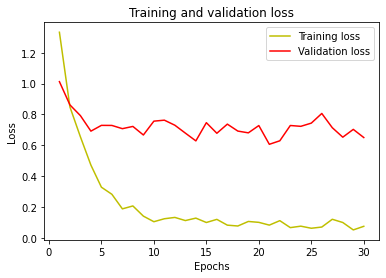

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

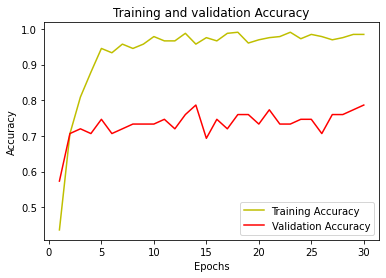

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

__Predictions for Test Data__

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [19]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose = 0)

Confusion Matrix without normalization
[[4 0 0 1 0]
 [2 3 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 1 4]]


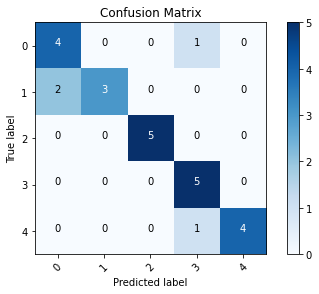

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#test_batches.class_indices
cm_plot_labels = ["0","1","2","3","4"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

__Predictions for Textual Inversion Trained Stable Diffusion 2 generated data__

In [21]:
#TISD1 were images created by Stable Diffusion with prompt: "<Cézanne> landscape painting"
TISD1_labels = TISD1_batches.classes

In [22]:
predictions = model.predict(x=TISD1_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({4: 10, 3: 6, 1: 8})

In [23]:
predictions

array([[1.35635812e-04, 4.34384495e-03, 1.55886018e-03, 2.30231835e-03,
        9.91659343e-01],
       [3.22660175e-03, 1.03355609e-01, 3.12190619e-03, 7.61400342e-01,
        1.28895476e-01],
       [1.46433124e-02, 3.32519054e-01, 1.82318259e-02, 2.75726127e-03,
        6.31848633e-01],
       [1.11861095e-01, 6.54271364e-01, 8.56145378e-03, 1.42038360e-01,
        8.32677409e-02],
       [3.20935622e-02, 3.76164801e-02, 1.13707082e-02, 7.90688246e-02,
        8.39850366e-01],
       [2.68537588e-02, 1.95638295e-02, 3.83909181e-04, 9.51994896e-01,
        1.20347610e-03],
       [3.01310960e-02, 7.13139474e-01, 6.15654700e-03, 1.98235765e-01,
        5.23371212e-02],
       [7.59663898e-03, 2.73713451e-02, 2.62977229e-03, 9.22279894e-01,
        4.01224196e-02],
       [4.61555831e-02, 4.00957435e-01, 8.18356425e-02, 1.26128316e-01,
        3.44923019e-01],
       [2.19122274e-03, 9.26059902e-01, 4.13891068e-03, 1.18912468e-02,
        5.57185896e-02],
       [1.14638737e-04, 4.1661

In [24]:
#TISD2 were images created by Stable Diffusion with prompt: "<Cézanne>"
TISD2_labels = TISD2_batches.classes

In [25]:
predictions = model.predict(x=TISD2_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({3: 15, 2: 2, 1: 7})

In [26]:
predictions

array([[8.92110765e-02, 3.38782906e-03, 5.51471077e-02, 8.42943251e-01,
        9.31078847e-03],
       [3.25126387e-03, 1.02177925e-01, 1.05843984e-01, 7.85369217e-01,
        3.35765141e-03],
       [1.64030790e-02, 3.69281888e-01, 4.38930765e-02, 5.59465408e-01,
        1.09565370e-02],
       [4.64315480e-03, 3.42608273e-01, 2.93677032e-01, 3.45898360e-01,
        1.31731685e-02],
       [3.54180788e-03, 1.42676517e-01, 2.12198235e-02, 7.43067384e-01,
        8.94945413e-02],
       [2.85076094e-04, 2.23392606e-01, 1.90528557e-02, 7.43795276e-01,
        1.34742633e-02],
       [9.54490341e-03, 3.35560441e-01, 6.40785217e-01, 8.87570065e-03,
        5.23380283e-03],
       [5.21675823e-03, 1.32050528e-03, 4.16740682e-03, 9.88536119e-01,
        7.59112067e-04],
       [2.50039864e-02, 5.51362693e-01, 1.52622061e-02, 4.05351102e-01,
        3.01999971e-03],
       [7.20717385e-03, 1.83633398e-02, 7.46924728e-02, 8.86413872e-01,
        1.33231804e-02],
       [2.12262874e-03, 1.0798